## PyTorch
https://tutorials.pytorch.kr/beginner/blitz/neural_networks_tutorial.html

### 모듈 구조
- torch : 메인 네임스페이스로 텐서 등의 다양한 수학 함수 포함
- torch.autograd : 자동 미분 기능 제공
- torch.nn : 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- torch.multiprocessing : 병렬처리 기능 제공
- torch.optim : SGD를 중심으로 한 파라미터 최적화 알고리즘 지공
- torch.utils : 데이터 조작 등의 유틸리티 기능 제공
- torch.onnx : Open Neural Network Exchange로, 서로 다른 프레임워크 간의 모델을 공유할 때 사용

### Tensor
- 데이터 표현을 위한 기본 구조로 텐서를 사용
- 데이터를 담기위한 컨테이너로서 일반적으로 수치형 데이터 저장
- NumPy의 ndarray와 유사
- GPU를 사용한 연산 가속 가능


- 0D : Scalar / Shape : ()
- 1D : Vector / Shape : (n, )
- 2D : Matrix / Shape : (n, n)
- 3D / Shape (n, n, n)
- 4D / Shape (n, n, n, n) : n×n×n Tensor가 n개 존재
- 5D / Shape (n, n, n, n, n) : n×n×n Tensor가 n×n개 존재
- 6D / Shape (n, n, n, n, n, n) : n×n×n Tensor가 n×n×n개 존재


In [1]:
import torch
torch.__version__

'1.11.0+cpu'

### 텐서 초기화 및 데이터 타입

In [2]:
# 초기화되지 않은 텐서
x = torch.empty(4,2)
print(x)

tensor([[8.4277e-16, 3.0653e-41],
        [0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00],
        [0.0000e+00, 2.7350e+20]])


In [3]:
# 무작위로 초기화된 텐서
x=torch.rand(4,2)
print(x)

tensor([[0.0094, 0.7302],
        [0.5190, 0.5036],
        [0.7264, 0.6168],
        [0.7024, 0.6086]])


In [4]:
# 데이터 타입이 long이고, 0 텐서
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [5]:
# 입력값으로 텐서 초기화
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [6]:
# 2×4 크기, Double 타입, 1의 텐서
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [7]:
# X와 같은 크기, float 타입, 무작위 텐서
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.0272, -0.3514, -0.0837,  1.0918],
        [ 0.0593, -1.1440,  1.1097,  1.5688]])


In [8]:
# 텐서 크기
x.size() # 2×4 크기의 텐서

torch.Size([2, 4])

### 데이터 타입
- torch.float : 32 bit floating
- torch.double : 64 bit floating
- torch.half : 16 bit floating
- torch.unit8 : 8 bit integer(unsigned)
- torch.int8 : 8 bit integer(signed)
- torch.short : 16 bit integer(signed)
- torch.int : 32 bit integer(signed)
- torch.long : 64 bit integer(signed)

In [9]:
ft = torch.FloatTensor([1,2,3])
print(ft, ft.dtype)

tensor([1., 2., 3.]) torch.float32


In [10]:
# Type Casting
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [11]:
it = torch.IntTensor([1,2,3])
print(it, it.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32


In [12]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- .to 메서드를 통해 텐서를 CPU, GPU 등으로 이동 가능

In [13]:
x = torch.randn(1)
print(x, x.item(), x.dtype)

tensor([-1.1678]) -1.1677838563919067 torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device=device)
print(y)
x = x.to(device)
z = x+y
print(z)
print(z.to('cpu',torch.double))

cpu
tensor([1.])
tensor([-0.1678])
tensor([-0.1678], dtype=torch.float64)


### 다차원 텐서 표현

In [15]:
# 0D Tensor : Scalar
# 하나의 숫자를 담고 있는 텐서
# 축과 형상 없음

t0 = torch.tensor(0)
print(t0.ndim, t0.shape, t0)

0 torch.Size([]) tensor(0)


In [16]:
# 1D Tensor : Vector
# 값이 저장된 리스트와 유사
# 하나의 축 존재

t1 = torch.tensor([1,2,3])
print(t1.ndim, t1.shape, t1)

1 torch.Size([3]) tensor([1, 2, 3])


In [17]:
# 2D Tensor : Matrix
# 행렬과 같은 모양으로 두개의 축 존재
# 일반적인 수치 및 통계 데이터셋이 해당
# 주로 Samples와 Features(특성)를 가진 구조로 사용

t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim, t2.shape, t2)

2 torch.Size([3, 3]) tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [18]:
# 3D Tensor
# 큐브와 같은 모양으로 세 개의 축 존재
# 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
# 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터셋 등
# 주로 Samples, Timesteps, Features를 가진 구조

t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim, t3.shape, t3)

3 torch.Size([3, 3, 3]) tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [19]:
# 4D Tensor
# 네 개의 축
# 컬러 이미지 데이터 (흑백 이미지는 3D Tensor로 처리 가능)
# Samples, Height(높이), Width(너비), Channel(컬러 채널)의 구조

t4 = torch.tensor([[[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]]])
print(t4.ndim, t4.shape, t4)

4 torch.Size([3, 3, 3, 3]) tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]],


        [[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]],


        [[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]],

         [[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])


In [20]:
# 5D Tensor
# 다섯 개의 축
# 비디오 데이터
# Samples, Frame, Height(높이), Width(너비), Channel(컬러 채널)의 구조

t5 = torch.tensor([[[[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]]],
                 [[[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]]],
                 [[[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]],
                 [[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]]]])
print(t5.ndim, t5.shape, t5)

5 torch.Size([3, 3, 3, 3, 3]) tensor([[[[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]]],



        [[[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]]],


         [[[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

          [[1, 2, 3],
           [4, 5, 6],
           [7, 8, 9]],

        

### 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [21]:
import math

a = torch.rand(1,2) * 2 - 1

print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

tensor([[-0.2769,  0.2214]])
tensor([[0.2769, 0.2214]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.2769,  0.2214]])


In [22]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,2])))

# max, min에 dim 인자를 입력할 경우 argmax, argmin 반환
# argmax(argmin) : 최대값(최소값)의 인덱스

tensor([[-0.2769,  0.2214]])
tensor(-0.2769)
tensor(0.2214)
tensor(-0.0277)
tensor(0.3524)
tensor(-0.0613)
tensor([1, 2, 3])


In [23]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0))
print(x.max(dim=1))

tensor([[0.2708, 0.8276],
        [0.0484, 0.2624]])
torch.return_types.max(
values=tensor([0.2708, 0.8276]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.8276, 0.2624]),
indices=tensor([1, 1]))


In [24]:
x = torch.rand(2,2)
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.7469, 0.8427],
        [0.0035, 0.6055]])
torch.return_types.min(
values=tensor([0.0035, 0.6055]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.7469, 0.0035]),
indices=tensor([0, 0]))


In [25]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)


tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7098, 0.1013],
        [0.9365, 0.5371]])


In [26]:
# torch.add : 덧셈
print(x+y)
print(torch.add(x,y))

# 동일한 결과

tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])


In [27]:
# 결과 텐서를 인자로 지정
result = torch.empty(2,4)
torch.add(x, y, out=result)
print(result)

tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# In-place 방식 (복사)
# _(Underbar)로 사용
# y.add_(x) == y += x
print(x)
print(y)
y.add_(x) # y.add(x)의 값을 y로 리턴
print(y)

tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7098, 0.1013],
        [0.9365, 0.5371]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])


In [29]:
# torch.sub : 뺄셈

print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])
tensor([[-0.7098, -0.1013],
        [-0.9365, -0.5371]])
tensor([[-0.7098, -0.1013],
        [-0.9365, -0.5371]])
tensor([[-0.7098, -0.1013],
        [-0.9365, -0.5371]])


In [30]:
# torch.mul : 곱셈

print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])
tensor([[0.0170, 0.0034],
        [0.7318, 1.0530]])
tensor([[0.0170, 0.0034],
        [0.7318, 1.0530]])
tensor([[0.0170, 0.0034],
        [0.7318, 1.0530]])


In [31]:
# torch.div : 나눗셈

print(x)
print(y)
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])
tensor([[0.0316, 0.2085],
        [0.3512, 0.5959]])
tensor([[0.0316, 0.2085],
        [0.3512, 0.5959]])
tensor([[0.0316, 0.2085],
        [0.3512, 0.5959]])


In [32]:
# torch.mm : 내적

print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) # .svd : 벡터 분해

tensor([[0.0232, 0.0267],
        [0.5070, 0.7922]])
tensor([[0.7330, 0.1279],
        [1.4435, 1.3293]])
tensor([[0.0555, 0.0384],
        [1.5151, 1.1179]])
tensor([[0.0555, 0.0384],
        [1.5151, 1.1179]])
torch.return_types.svd(
U=tensor([[-0.0358, -0.9994],
        [-0.9994,  0.0358]]),
S=tensor([1.8840, 0.0020]),
V=tensor([[-0.8047, -0.5937],
        [-0.5937,  0.8047]]))


### 텐서의 조작

- Indexing : NumPy와 같이 Indexing 형태로 사용 가능

In [33]:
x = torch.tensor([[1,2],
                  [3,4]])
print(x)

# Indexing
print(x[0,0])
print(x[1,0])
print(x[0,1])
print(x[1,1])

# Slicing
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1, 2],
        [3, 4]])
tensor(1)
tensor(3)
tensor(2)
tensor(4)
tensor([1, 3])
tensor([2, 4])
tensor([1, 2])
tensor([3, 4])


- view : 텐서의 크기(size) 또는 모양(shape)을 변경
- - 기본적으로 변경 전과 후 모두 텐서의 원소 개수가 유지되어야 함
- - -1로 설정되면 계산을 통해 해당 크기값을 유추

In [34]:
x = torch.randn(4,5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1)
print(z)

tensor([[ 1.4625, -0.2082, -0.8353,  0.0680, -1.0112],
        [-0.7523,  0.5836, -2.2166, -1.3282, -0.3322],
        [ 1.4961, -1.7424,  0.7120,  0.0677,  0.1275],
        [ 0.7458, -0.5074,  0.9344,  0.7676, -1.3330]])
tensor([ 1.4625, -0.2082, -0.8353,  0.0680, -1.0112, -0.7523,  0.5836, -2.2166,
        -1.3282, -0.3322,  1.4961, -1.7424,  0.7120,  0.0677,  0.1275,  0.7458,
        -0.5074,  0.9344,  0.7676, -1.3330])
tensor([[ 1.4625, -0.2082, -0.8353,  0.0680],
        [-1.0112, -0.7523,  0.5836, -2.2166],
        [-1.3282, -0.3322,  1.4961, -1.7424],
        [ 0.7120,  0.0677,  0.1275,  0.7458],
        [-0.5074,  0.9344,  0.7676, -1.3330]])


- item : 텐서에 하나의 스칼라값만이 존재하면 해당값 반환

In [35]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.7533])
-0.7532943487167358
torch.float32


In [36]:
# 스칼라값 하나만 존재해야 item() 사용 가능
x = torch.randn(2,2)
print(x)
# print(x.item())
# Value Error 발생
print(x.dtype)

tensor([[ 1.0595, -1.0409],
        [-0.0753, -0.2983]])
torch.float32


- squeeze : 차원 축소(제거)

In [37]:
x = torch.rand(1,3,3)
print(x)
print(x.shape)

tensor([[[0.8011, 0.6849, 0.2963],
         [0.1916, 0.9122, 0.8232],
         [0.8038, 0.8805, 0.4590]]])
torch.Size([1, 3, 3])


In [38]:
xs= x.squeeze()
print(xs)
print(xs.shape)

tensor([[0.8011, 0.6849, 0.2963],
        [0.1916, 0.9122, 0.8232],
        [0.8038, 0.8805, 0.4590]])
torch.Size([3, 3])


- unsqueeze : 차원 증가(생성)

In [39]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.7042, 0.3373, 0.4645],
        [0.1831, 0.7436, 0.2925],
        [0.5258, 0.5719, 0.3485]])
torch.Size([3, 3])


In [40]:
ten = t.unsqueeze(dim=0)
# dim=0 : 첫 번째 차원
print(ten)
print(ten.shape)

tensor([[[0.7042, 0.3373, 0.4645],
         [0.1831, 0.7436, 0.2925],
         [0.5258, 0.5719, 0.3485]]])
torch.Size([1, 3, 3])


In [41]:
ten = t.unsqueeze(dim=2)
# dim=2 : 세 번째 차원
print(ten)
print(ten.shape)

tensor([[[0.7042],
         [0.3373],
         [0.4645]],

        [[0.1831],
         [0.7436],
         [0.2925]],

        [[0.5258],
         [0.5719],
         [0.3485]]])
torch.Size([3, 3, 1])


- stack : 텐서 간 결합

In [42]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


- cat : 텐서 결합 메서드(concatenate)
- - NumPy의 stack과 유사하지만 stack할 dim이 존재해야함
- - 해당 차원을 증가시킨 후 결합

In [43]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

# 1차원 기준으로 결합하여 1차원 증가

tensor([[[-1.8976, -1.3764, -1.0878],
         [ 0.1358,  0.5643,  0.1450],
         [-0.0462, -0.5271,  0.9161]]])
tensor([[[ 1.5343,  0.1894, -0.5526],
         [-0.1346,  0.2279, -1.6523],
         [ 1.0560,  0.0042, -1.3534]]])
tensor([[[-1.8976, -1.3764, -1.0878],
         [ 0.1358,  0.5643,  0.1450],
         [-0.0462, -0.5271,  0.9161]],

        [[ 1.5343,  0.1894, -0.5526],
         [-0.1346,  0.2279, -1.6523],
         [ 1.0560,  0.0042, -1.3534]]])
torch.Size([2, 3, 3])


In [44]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

# 2차원 결합으로 2차원 증가

tensor([[[-1.7909,  1.4140, -0.2515],
         [-0.1519,  0.6966,  1.6282],
         [ 0.4559, -0.1130,  0.0190]]])
tensor([[[ 1.3823,  0.4846, -1.0655],
         [-0.6558,  0.8291,  0.9599],
         [-1.0238, -1.3357,  0.7046]]])
tensor([[[-1.7909,  1.4140, -0.2515],
         [-0.1519,  0.6966,  1.6282],
         [ 0.4559, -0.1130,  0.0190],
         [ 1.3823,  0.4846, -1.0655],
         [-0.6558,  0.8291,  0.9599],
         [-1.0238, -1.3357,  0.7046]]])
torch.Size([1, 6, 3])


- chunk : 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인지 지정)

In [45]:
t = torch.rand(3,6)
print(t)

t1, t2, t3 = torch.chunk(t, 3, dim=1)
# 2차원을 기준으로 3으로 나눔 : 3×2
print(t1, t1.shape)
print(t2, t2.shape)
print(t3, t3.shape)

tensor([[0.6081, 0.4192, 0.1917, 0.3067, 0.3208, 0.4757],
        [0.3738, 0.0619, 0.3893, 0.6032, 0.8040, 0.7028],
        [0.2374, 0.7211, 0.3422, 0.1937, 0.3705, 0.2919]])
tensor([[0.6081, 0.4192],
        [0.3738, 0.0619],
        [0.2374, 0.7211]]) torch.Size([3, 2])
tensor([[0.1917, 0.3067],
        [0.3893, 0.6032],
        [0.3422, 0.1937]]) torch.Size([3, 2])
tensor([[0.3208, 0.4757],
        [0.8040, 0.7028],
        [0.3705, 0.2919]]) torch.Size([3, 2])


In [46]:
t = torch.rand(3,6)
print(t)

t1, t2, t3 = torch.chunk(t, 3, dim=0)
# 1차원을 기준으로 3으로 나눔 : 1×6
print(t1, t1.shape)
print(t2, t2.shape)
print(t3, t3.shape)

tensor([[0.1514, 0.4601, 0.0558, 0.1986, 0.3523, 0.3154],
        [0.1305, 0.1081, 0.9482, 0.8463, 0.5731, 0.3841],
        [0.8634, 0.8308, 0.6967, 0.1905, 0.2257, 0.4279]])
tensor([[0.1514, 0.4601, 0.0558, 0.1986, 0.3523, 0.3154]]) torch.Size([1, 6])
tensor([[0.1305, 0.1081, 0.9482, 0.8463, 0.5731, 0.3841]]) torch.Size([1, 6])
tensor([[0.8634, 0.8308, 0.6967, 0.1905, 0.2257, 0.4279]]) torch.Size([1, 6])


- split : chunk와 동일하게 텐서를 여러 개로 나눌 때 사용(어떤 크기로 나눌 것인지 지정)

In [47]:
t = torch.rand(3,6)
t1, t2= torch.split(t,3,dim=1)

print(t)
print(t1, t1.shape)
print(t2, t2.shape)

tensor([[0.7360, 0.8410, 0.6132, 0.9213, 0.3851, 0.1081],
        [0.2084, 0.2059, 0.9455, 0.0602, 0.7603, 0.4478],
        [0.9266, 0.7281, 0.2013, 0.4071, 0.9546, 0.5323]])
tensor([[0.7360, 0.8410, 0.6132],
        [0.2084, 0.2059, 0.9455],
        [0.9266, 0.7281, 0.2013]]) torch.Size([3, 3])
tensor([[0.9213, 0.3851, 0.1081],
        [0.0602, 0.7603, 0.4478],
        [0.4071, 0.9546, 0.5323]]) torch.Size([3, 3])


### PyTorch  NumPy
- PyTorch의 Tensor를 NumPy의 Array로 변환 가능
- - numpy()
- - from_numpy()
- Tensor가 CPU 상에 존재할 경우 NumPy 배열은 메모리 공간을 공유하므로 하나가 변경되면 다른 하나도 변경

In [48]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [49]:
b = a.numpy() # array 형태
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [50]:
a.add_(1)
print(a) # Tensor
print(b) # Array

# Tensor가 CPU 상에 있으므로 a가 업데이트되면서 b도 업데이트

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [51]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a) # array
print(b) # tensor

# 만약 텐서가 GPU 공간에 있을 경우에는 서로의 정보는 공유되지 않음

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


### Autograd

- 텐서의 모든 연산에 대해 자동 미분 연산 적용
- 작성한 코드 실행에 대하여 역전파 정의
- backprop을 위해 미분값 자동 계산

- requires_grad 속성 True로 설정할 시 해당 텐서에서 이루어지는 모든 연산 추적
- 기록 추적 중단을 위해서는 .detach() 매서드를 호출하여 연산 기록으로부터 분리

In [52]:
a = torch.randn(3,3)
a *= 3
print(a)
print(a.requires_grad)

tensor([[ 2.2037,  2.7503,  1.4514],
        [ 2.0591, -6.0041, -1.0950],
        [-5.5689, -1.4087, -4.0489]])
False


- requires_grad_는 requires_grad의 값을 in-place로 변경
- grad_fn은 미분값을 계산한 함수에 대한 정보를 저장(어떤 함수에 대하여 backprop를 했는지 저장)

In [53]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(105.4060, grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [54]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [55]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [56]:
z = y*y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


- 계산 완료 후 backward()를 호출하면 자동으로 역전파 계산 가능
- grad 속성에 누적

In [57]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


- grad : 데이터가 거쳐온 layer에 대한 미분값 저장

In [58]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [59]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y*2
    
print(y)

tensor([-712.5698, -453.7564, -673.3422], grad_fn=<MulBackward0>)


In [60]:
v = torch.tensor([0.1, 1.0, 1e-4], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- with torch.no_grad()로 기울기 업데이트 중지 가능
- 기록 추적을 방지하기 위해 코드 블록을 with torch.no_grad()로 감싼다면 기울기 계산은 필요없지만 requires_grad=True로 설정되어 학습가능한 매개변수를 갖는 모델을 평가할 때 유용

In [61]:
print(x.requires_grad) # True
print((x**2).requires_grad) # True

with torch.no_grad():
    print((x**2).requires_grad)
    # False / gradient 업데이트 ×

True
True
False


- detach() : 내용은 같지만 requires_grad가 다른 새로운 텐서를 가져올 때

In [62]:
print(x.requires_grad)
print(x)
y = x.detach()
print(y.requires_grad)
print(y)
print(x.eq(y).all())

True
tensor([-0.6959, -0.4431, -0.6576], requires_grad=True)
False
tensor([-0.6959, -0.4431, -0.6576])
tensor(True)


### 자동 미분 흐름
- 계산 흐름 : a > b > c > out dout / da = ?
- backward()를 통해 a < b < c < out을 계산하면 dout / da 값이 a.grad에 계산

In [63]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [64]:
print(a.data)
print(a.grad)
print(a.grad_fn)
# 현재 a에 연산이 없으므로 None

tensor([[1., 1.],
        [1., 1.]])
None
None


In [65]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [66]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [67]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [68]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [69]:
print(a.data)
print(a.grad)
print(a.grad_fn)
# a값을 활용만 했을 뿐 a값을 직접 계산한 과정은 없었기 때문에 None

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [70]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [71]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


In [72]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


### 데이터 준비
- torch.utils.data의 Dataset과 DataLoader 사용 가능
- Dataset에는 Vision, Text, Audio에 관한 다양한 데이터셋 존재
- Dataset과 DataLoader를 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 로드할 것인지를 정할 수 있음

In [73]:
from torch.utils.data import Dataset, DataLoader

### Torchvision
- PyTorch에서 제공하는 데이터셋이 모여있는 패키지
- transforms : 전처리할 때 사용하는 메서드
- transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 수행

In [74]:
from torchvision.transforms import transforms
from torchvision import datasets

- DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안의 순서대로 전처리 수행
- ToTensor() 사용 이유는 torchvision이 PIL Image 형태로만 입력을 받으므로 데이터 처리를 위하여 텐서형으로 변환 필요

In [75]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5), std=(1.0))])

In [76]:
trainset = datasets.MNIST(root='/output/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/output/',
                         train=False, download=True,
                         transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /output/MNIST/raw/train-images-idx3-ubyte.gz to /output/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /output/MNIST/raw/train-labels-idx1-ubyte.gz to /output/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /output/MNIST/raw/t10k-images-idx3-ubyte.gz to /output/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /output/MNIST/raw/t10k-labels-idx1-ubyte.gz to /output/MNIST/raw



- DataLoader는 데이터 전체를 보관했다가 실제 모델 학습 때 batch_size 크기만큼의 데이터 로드

In [77]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [78]:
dataiter = iter(train_loader) # iteration을 통해 로드
images, labels = dataiter.next()
images.shape, labels.shape
# (batch_size, channel, size, size)

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [79]:
torch_image = torch.squeeze(images[0])
torch_image.shape
# squeeze(차원축소)를 통해 (size, size)만 존재

torch.Size([28, 28])

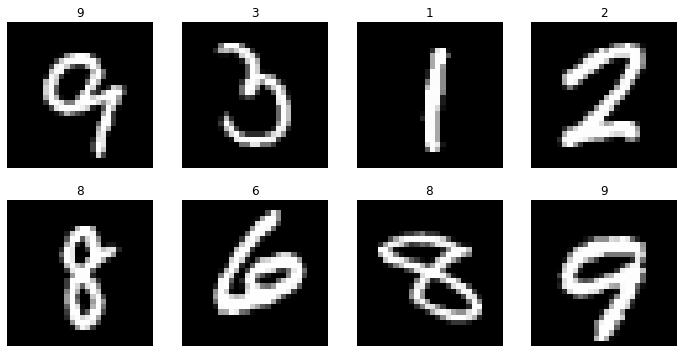

In [80]:
# 시각화

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2 # batch_size
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    # 전체 trainset 개수에서 size 기준(1, )으로 랜덤값 텐서를 생성하고, 그 실제값 출력
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
    
plt.show();

### 신경망 구성
- Layer : 신경망의 핵심 데이터 구조로, 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- Module : 한 개 이상의 계층이 모여 구성
- Model : 한 개 이상의 모듈이 모여서 구성

### torch.nn 패키지
- 주로 가중치(weights), 편향(bias) 값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용(weight 값을 직접 선언하지 않음)

In [81]:
import torch.nn as nn

- nn.Linear 계층

In [82]:
input = torch.randn(128,20)
print(input)
print(input.size())

m = nn.Linear(20 ,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[-2.0219,  1.3968, -0.1090,  ...,  0.4237,  0.1277, -1.6965],
        [ 0.2401, -1.3255, -0.4184,  ..., -1.2131,  0.2094,  1.4117],
        [-0.6884, -0.6169, -0.1476,  ...,  0.0185,  1.1196, -0.7493],
        ...,
        [-1.2762, -0.3356, -0.2549,  ..., -0.8259, -0.6790,  0.7918],
        [ 1.3956,  1.6955,  0.1774,  ...,  0.1441, -0.3363, -0.1905],
        [-2.0563, -0.8539, -0.6508,  ..., -1.2524, -0.0972, -0.8227]])
torch.Size([128, 20])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.1398,  0.7386,  0.8528,  ...,  0.4565, -0.5183,  0.0674],
        [-0.2444, -0.6620,  0.7899,  ..., -0.7304,  0.3946, -0.3359],
        [ 0.2401,  0.0053,  0.6571,  ...,  0.4825,  0.2471,  0.6067],
        ...,
        [-0.7791,  0.3562,  0.2795,  ..., -1.1174,  0.0754, -0.1516],
        [-0.3214, -0.0831,  0.0426,  ...,  0.0983,  0.1937,  0.1543],
        [ 0.6906, -0.3216,  0.7404,  ..., -0.1300,  0.3234,  0.2588]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


- nn.Conv2d 계층

In [83]:
input = torch.randn(20,16,50,100)
print(input)
print(input.size())

tensor([[[[-3.8170e-01,  1.3410e+00,  1.0092e-01,  ..., -8.4826e-01,
            1.8409e+00, -3.7673e-01],
          [ 1.5018e+00, -9.9830e-01, -1.5834e+00,  ..., -1.8097e-01,
           -1.3532e+00, -2.4728e-01],
          [-1.1738e+00, -1.4043e+00,  3.9640e-01,  ...,  1.2744e+00,
           -8.2598e-01, -3.4772e-01],
          ...,
          [-1.5981e-01, -1.0154e+00, -1.1266e+00,  ..., -8.8544e-01,
           -7.0559e-01,  7.4357e-01],
          [ 1.9206e+00, -1.0168e+00,  7.4090e-01,  ..., -1.7027e+00,
            1.1511e+00, -8.7574e-01],
          [ 1.2363e+00, -1.4803e+00,  3.8000e-01,  ..., -1.9572e+00,
            5.5650e-02,  2.5117e-01]],

         [[-1.3973e+00,  1.0186e+00,  3.2316e-01,  ..., -3.2195e-01,
            1.2690e+00,  1.3023e+00],
          [-8.6407e-01, -2.7637e-01, -1.0314e+00,  ...,  2.9406e-01,
           -1.2691e+00, -1.0713e-01],
          [ 2.7129e-01, -1.2072e+00,  7.7288e-01,  ..., -1.0997e+00,
           -7.9124e-01,  1.3949e-01],
          ...,
     

In [84]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [85]:
output = m(input)
print(output)
print(output.size())

tensor([[[[-9.9025e-03,  4.4997e-01, -5.5781e-01,  ...,  5.5963e-02,
            3.9087e-01,  2.4244e-02],
          [ 5.7480e-02, -4.7817e-01,  7.2434e-02,  ..., -7.9643e-01,
            7.1767e-01,  1.5006e-02],
          [-7.5282e-01, -1.0498e+00,  1.3119e+00,  ...,  4.4744e-02,
           -4.2574e-01, -2.4716e-01],
          ...,
          [-3.1689e-01, -8.8769e-01,  2.4428e-01,  ...,  1.1149e+00,
            2.6315e-01,  3.6932e-01],
          [-5.7976e-04,  3.8360e-01,  7.2986e-01,  ...,  4.4594e-01,
           -8.0391e-01,  1.9855e-01],
          [ 1.2948e-01,  9.4247e-02, -3.5206e-02,  ...,  3.6204e-01,
           -4.1258e-02,  3.9900e-01]],

         [[ 1.1715e-01,  3.2679e-01, -3.0457e-01,  ..., -2.0161e-01,
           -2.2189e-01, -1.6933e-01],
          [-4.4647e-01,  5.9842e-01, -6.2476e-01,  ...,  1.9201e-01,
            3.1107e-01,  1.0152e-01],
          [-2.0346e-01,  9.7048e-01,  8.5982e-01,  ..., -1.5328e+00,
           -8.8132e-01,  4.0102e-01],
          ...,
     

### Convolution Layers
- in_channels : 채널의 개수
- out_channels : 출력 채널의 개수
- kernel_size : 커널(필터) 사이즈

In [86]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [87]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))

- Weight 확인

In [88]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [89]:
weight = weight.detach()
print(weight)
# Weight는 detach()를 통해야 numpy() 변환 가능
weight = weight.numpy()
weight.shape

tensor([[[[-1.6518e-01, -1.4136e-01,  1.2568e-01,  1.7008e-01, -1.1921e-01],
          [ 3.0469e-02, -8.4632e-02,  3.4049e-02, -1.3091e-03, -9.6309e-02],
          [-3.3495e-02,  1.6706e-01,  3.5009e-02,  1.5417e-01,  6.3471e-02],
          [-5.6858e-02,  2.9199e-02, -3.9587e-02,  1.0432e-01,  2.8224e-02],
          [-1.2600e-01,  1.7669e-01, -8.5225e-02,  3.9354e-02,  1.5976e-01]]],


        [[[ 1.0315e-01, -2.0615e-02,  1.1972e-01,  1.3264e-01,  4.1271e-02],
          [ 1.4959e-01, -3.9380e-02,  1.8142e-01, -1.4467e-02,  1.7043e-01],
          [ 8.2237e-02, -6.8770e-02,  1.8919e-01, -1.0773e-01,  1.4020e-01],
          [-1.8794e-01,  1.4830e-01, -1.4271e-01, -1.5123e-01,  8.5867e-02],
          [ 1.4658e-01, -7.0205e-02,  1.3457e-01,  1.4505e-01, -1.0711e-01]]],


        [[[ 1.0572e-01,  2.4420e-02,  1.4535e-01,  2.5849e-02, -5.5470e-02],
          [ 8.0977e-02,  2.4237e-02, -1.2302e-01,  1.6839e-01,  8.3722e-02],
          [ 4.6836e-03, -6.3171e-02, -6.7869e-02,  8.1172e-03, -1.62

(20, 1, 5, 5)

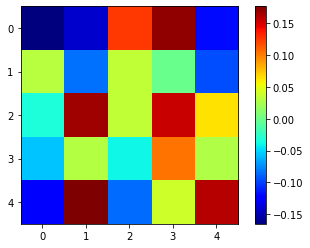

In [90]:
# 시각화
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show();

In [91]:
print(images.shape)
# (batch_size, channel, size, size)
print(images[0].size())

input_image=torch.squeeze(images[0])
# 차원 축소(squeeze)
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [92]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

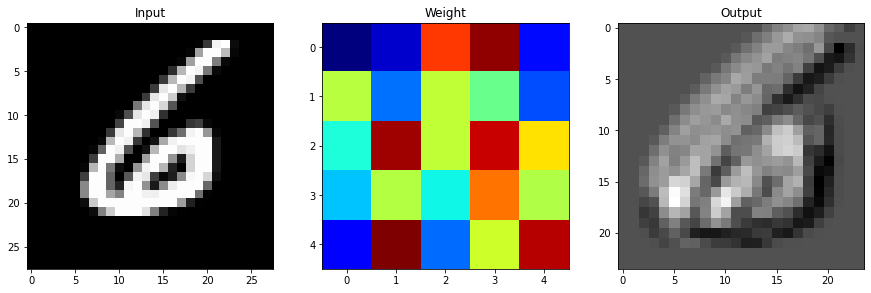

In [93]:
# Convolution Layer 적용 시각화
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')

plt.show();

### Pooling Layer
- F.max_pool2d
- - stride
- - kernel_size
- torch.nn.MaxPool2d도 많이 사용

In [94]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2,2)
pool.shape
# 가로, 세로 각각 1/2

torch.Size([1, 20, 12, 12])

In [95]:
pool_arr = pool.numpy()
pool_arr.shape
# Max Pool Layer는 weight가 없기 때문에 바로 numpy() 변환 가능

(1, 20, 12, 12)

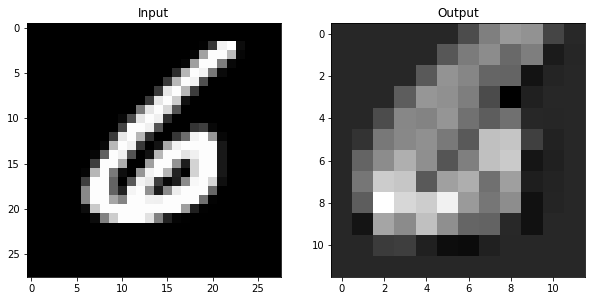

In [96]:
# Convolution Layer 적용 시각화
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

plt.show();

### Linear Layer
- 1d만 가능하므로 .view()를 통해 1d로 펼침 필요

In [97]:
flatten = input_image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [98]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [99]:
lin

tensor([[-0.0149,  0.4214, -0.3935, -0.1931,  0.0740, -0.2543,  0.4406, -0.4747,
         -0.1387,  0.2739]], grad_fn=<AddmmBackward0>)

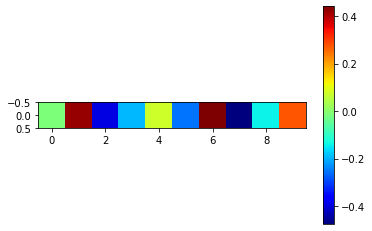

In [100]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show();

### Non-linear Activation(비선형 활성화)
- F.softmax와 같은 활성화함수 등

In [101]:
with torch.no_grad():
    flatten = input_image.view(1, 28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin,dim=1)
    
softmax

tensor([[0.1213, 0.1231, 0.0866, 0.0757, 0.0992, 0.1455, 0.1184, 0.0787, 0.0635,
         0.0880]])

In [102]:
np.sum(softmax.numpy())

# softmax의 결과는 모든 class(MNIST 10개)의 합이 100%

1.0

- F.relu
- - ReLU 함수 적용 레이어
- - nn.ReLU도 가능

In [103]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [104]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 신경망 종류

https://colab.research.google.com/drive/1dTWN0jiVIWcPUjfS7J9IT-LE4ACSB2PE?usp=sharing#scrollTo=6Fit4HLffPLC

## 모델 정의

### nn.Module 상속 클래스 정의
- nn.Module을 상속받는 클래스 정의
- __init__() : 모델에서 사용될 모듈과 활성화 함수 등을 정의 (초기화)
- forward() : 모델에서 실행되어야 하는 연산 정의

In [105]:
class Model(nn.Module):
    def __init__(self, inputs): # 초기화
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1) # 사용할 Layer 정의
        self.activation = nn.Sigmoid() # 사용할 Activation 정의
        
    def forward(self, x):
        x = self.layer(x) # 정의된 self.layer에 입력된 x 통과
        x = self.activation(x) # self.layer를 지난 x가 정의된 self.activation을 통과
        return x

In [106]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### nn.Sequential 신경망 정의
- nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행
- __init__()에서 사용할 네트워크 모델을 nn.Sequential로 정의 가능
- forward()에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [107]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [108]:
model = Model()
print(list(model.children()))

print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### PyTorch - Pre-trained Model

https://pytorch.org/vision/stable/models.html

## Model Parameter

### Loss Function(손실 함수)
- 예측값과 실제값 사이의 오차 측정
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지를 나타내는 지표
- 모델이 훈련되는 동안 최소화되어야할 값으로, 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 최적화 이론에서 최소화하고자 하는 함수
- 미분 가능한 함수 사용
- **PyTorch의 주요 Loss Fucntion**
- - torch.nn.BCELoss : 이진 분류를 위한 함수
- - torch.nn.CrossEntropyLoss : 다중 클래스 분류를 위한 함수
- - torch.nn.MSELose : 회귀 모델에서 사용하는 함수

In [109]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### Optimizer
- 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지를 결정(특정 종류의 확률적 경사 하강법 구현)
- optimizer는 ster()을 통해 전달받은 파라미터로 모델 업데이트
- 모든 optimizer의 기본으로 torch.optim.Optimizer(params, defaults) 클래스 사용
- zero_grad()를 이용해 optimizer에 사용된 파라미터들의 기울기를 0으로 설정
- torch.optim.lr_scheduler를 이용하여 epochs에 따라 학습률(lr; Learning Rate) 조절
- **PyTorch의 주요 Optimizer**
- - optim.Adadelta
- - optim.Adagrad
- - optim.Adam
- - optim.RMSprop
- - optim.SGD


### lr_scheduler(Learning Rate Scheduler)
- 학습 시 특정 조건에 따라 학습률을 조정하여 최적화 진행
- 일정 횟수 이상이 되면 학습률을 감소(Decay)시키거나 전역 최소점(Global Minimum) 근처에 도달하면 학습률을 줄이는 등의 방법
- **PyTorch의 lr_scheduler**
- - optim.lr_scheduler.LambdaLR : 람다(Lambda) 함수를 이용해 그 결과를 학습률로 설정
- - optim.lr_scheduler.StepLR : 단계(Step)마다 학습률을 감마(gamma) 비율만큼 감소
- - optim.lr_scheduler.MultiStepLR : StepLR과 비슷하지만 특정 단계가 아닌 지정된 epoch에서만 감마 비율만큼 감소
- - optim.lr_scheduler.ExponentialLR : epoch마다 이전 학습률에 감마만큼 곱셈
- - optim.lr_scheduler.CosineAnnealingLR : 학습률을 cos(코사인) 함수의 형태처럼 변화시켜 학습률이 커지기도, 작아지기도 하는 스케줄러
- - optim.lr_scheduler.ReduceLROnPlateau : 학습이 잘 되는지 아닌지에 따라 동적으로 학습률을 변화


### Metrics(지표) - torchmetrics
- 모델의 학습과 테스트 단계를 모니터링

In [110]:
!pip install torchmetrics

In [111]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
# 행 각각(10개)에 softmax를 취하여 행 중 가장 큰 값을 실제값과 비교
target = torch.randint(5, (10, ))
print('예측값 :',preds)
print('출력값 :',target)

acc = torchmetrics.functional.accuracy(preds, target)
print('Accuracy :', acc)

예측값 : tensor([[0.2329, 0.1260, 0.4269, 0.1781, 0.0361],
        [0.1400, 0.0827, 0.2977, 0.3651, 0.1146],
        [0.3332, 0.3135, 0.0930, 0.0221, 0.2382],
        [0.0480, 0.1215, 0.3997, 0.2831, 0.1477],
        [0.6314, 0.0166, 0.0363, 0.2275, 0.0882],
        [0.0160, 0.1818, 0.4069, 0.1780, 0.2172],
        [0.1116, 0.3396, 0.2579, 0.1495, 0.1414],
        [0.1881, 0.0666, 0.0212, 0.5511, 0.1730],
        [0.0617, 0.2547, 0.0120, 0.0219, 0.6497],
        [0.1310, 0.2411, 0.2639, 0.1487, 0.2153]])
출력값 : tensor([0, 2, 4, 4, 4, 4, 0, 3, 3, 2])
Accuracy : tensor(0.2000)


In [112]:
metric = torchmetrics.Accuracy()

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10, ))
    
    acc = metric(preds, target)
    print('Accuracy :', acc)
    
acc = metric.compute()
print('Final Accuracy :', acc)

Accuracy : tensor(0.3000)
Accuracy : tensor(0.1000)
Accuracy : tensor(0.5000)
Accuracy : tensor(0.4000)
Accuracy : tensor(0.1000)
Accuracy : tensor(0.2000)
Accuracy : tensor(0.2000)
Accuracy : tensor(0.2000)
Accuracy : tensor(0.2000)
Accuracy : tensor(0.3000)
Final Accuracy : tensor(0.2500)


## Linear Regression Model(선형 회귀 모델)

### 데이터 생성

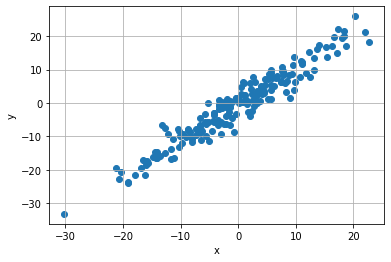

In [113]:
x = torch.randn(200, 1) * 10
y = x + 3 * torch.randn(200, 1)

plt.scatter(x.numpy(), y.numpy()) # scatter plot
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show();

# 선형 데이터 생성

### 모델 정의 및 파라미터

In [114]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [115]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.9390]], requires_grad=True), Parameter containing:
tensor([-0.6152], requires_grad=True)]


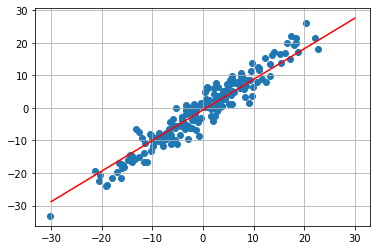

0.939016580581665 -0.6151964664459229


In [116]:
# 현재 파라미터 값 출력
w, b = model.parameters() # weight, bias

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1 # Linear Regression

plt.plot(x1, y1, 'r')
plt.scatter(x, y)
plt.grid()
plt.show();

print(w1, b1)

### Loss Function & Optimizer

In [117]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습

In [118]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # Gradient 값 초기화(0)
    
    y_pred = model(x) # 실제 x가 모델을 통과하여 모델이 예측하는 값
    loss = criterion(y_pred, y) # 예측값과 실제값의 차이 계산
    losses.append(loss.item())
    loss.backward() # 한 번 예측 후 모델 각각에 역전파(자동 미분)를 전달하여 업데이트
    
    optimizer.step() # 다음 단계 진행

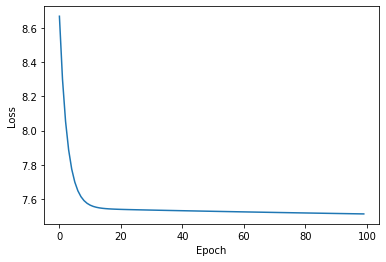

In [119]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show();

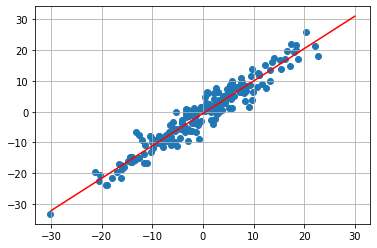

1.05088472366333 -0.5571633577346802


In [120]:
# 학습 후 결과

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1 # Linear Regression

plt.plot(x1, y1, 'r')
plt.scatter(x, y)
plt.grid()
plt.show();

print(w1, b1)